In [2]:
  import pandas as pd

   train = pd.read_csv("../input/train.csv")
   test = pd.read_csv("../input/test.csv")
   train.head()

IndentationError: unexpected indent (52284506.py, line 3)

In [2]:
import pandas as pd

train = pd.read_csv("../input/train.csv")
test = pd.read_csv("../input/test.csv")
train.head()

FileNotFoundError: [Errno 2] No such file or directory: '../input/train.csv'

In [2]:
   !ls ../input

gender_submission.csv  test.csv  titanic.zip  train.csv


In [3]:
   train = pd.read_csv("../input/train.csv")
   test = pd.read_csv("../input/test.csv")

NameError: name 'pd' is not defined

In [4]:
import os
os.getcwd()

'/workspace/notebooks'

In [6]:
  import pandas as pd

   train = pd.read_csv("../input/train.csv")
   test = pd.read_csv("../input/test.csv")

IndentationError: unexpected indent (2132125998.py, line 3)

In [7]:
import pandas as pd

train = pd.read_csv("/workspace/input/train.csv")
test = pd.read_csv("/workspace/input/test.csv")
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
train.head()           # 先頭5行
train.info()           # 型と欠損
train.describe()       # 数値列の統計

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [10]:
train["Sex"].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

In [11]:
train["Embarked"].value_counts(dropna=False)

Embarked
S      644
C      168
Q       77
NaN      2
Name: count, dtype: int64

In [12]:
train.groupby("Sex")["Survived"].mean()

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

In [13]:
train.groupby("Pclass")["Survived"].mean()

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

In [15]:
women = train.loc[train.Sex == 'female']["Survived"]
rate_women = sum(women)/len(women)

print("% of women who survived:", rate_women)

% of women who survived: 0.7420382165605095


In [16]:
men = train.loc[train.Sex == 'male']["Survived"]
rate_men = sum(men)/len(men)

print("% of men who survived:", rate_men)

% of men who survived: 0.18890814558058924


In [18]:
from sklearn.ensemble import RandomForestClassifier

y = train["Survived"]

features = ["Pclass", "Sex", "SibSp", "Parch"]
X = pd.get_dummies(train[features])
X_test = pd.get_dummies(test[features])

model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
model.fit(X, y)
predictions = model.predict(X_test)

output = pd.DataFrame({'PassengerId': test.PassengerId, 'Survived': predictions})
output.to_csv('my_submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!


In [20]:
y = train["Survived"]
features = ["Pclass", "Sex", "SibSp", "Parch"]
X = pd.get_dummies(train[features])
X_test = pd.get_dummies(test[features])
X_test = X_test.reindex(columns=X.columns, fill_value=0)

In [21]:
   from sklearn.ensemble import RandomForestClassifier
   model = RandomForestClassifier(random_state=0)
   model.fit(X, y)

RandomForestClassifier(random_state=0)

In [22]:
   preds = model.predict(X_test)
   submission = pd.DataFrame({"PassengerId": test["PassengerId"], "Survived": preds})
   submission.to_csv("/workspace/submission.csv", index=False)

In [1]:
train.info()
train.describe()
train.isnull().sum().sort_values(ascending=False)

NameError: name 'train' is not defined

In [14]:
import pandas as pd

train = pd.read_csv("../input/train.csv")
test = pd.read_csv("../input/test.csv")
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [15]:
train.groupby("Sex")["Survived"].mean()
train.groupby("Pclass")["Survived"].mean()
train.groupby("Embarked")["Survived"].mean()

Embarked
C    0.553571
Q    0.389610
S    0.336957
Name: Survived, dtype: float64

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

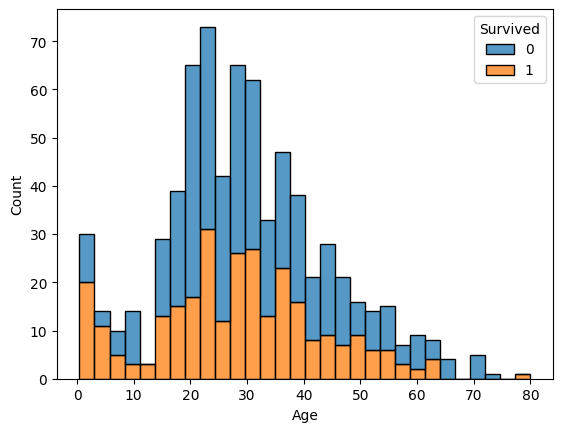

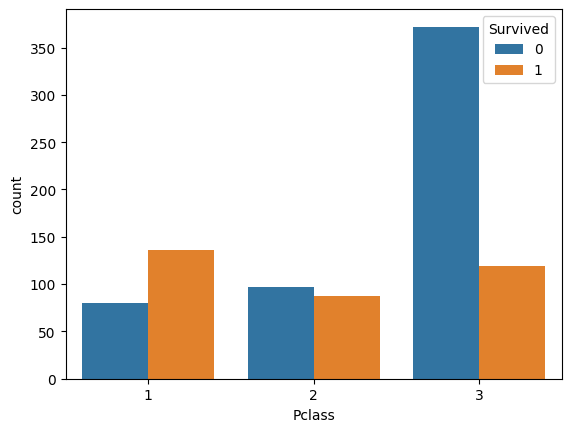

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(data=train, x="Age", hue="Survived", bins=30, multiple="stack")
plt.show()

sns.countplot(data=train, x="Pclass", hue="Survived")
plt.show()

In [17]:
pd.crosstab(train["Pclass"], train["Survived"], normalize="index")
pd.crosstab(train["Sex"], train["Survived"], normalize="index")

Survived,0,1
Sex,,
female,0.257962,0.742038
male,0.811092,0.188908


In [18]:
train.corr(numeric_only=True)["Survived"].sort_values(ascending=False)

Survived       1.000000
Fare           0.257307
Parch          0.081629
PassengerId   -0.005007
SibSp         -0.035322
Age           -0.077221
Pclass        -0.338481
Name: Survived, dtype: float64

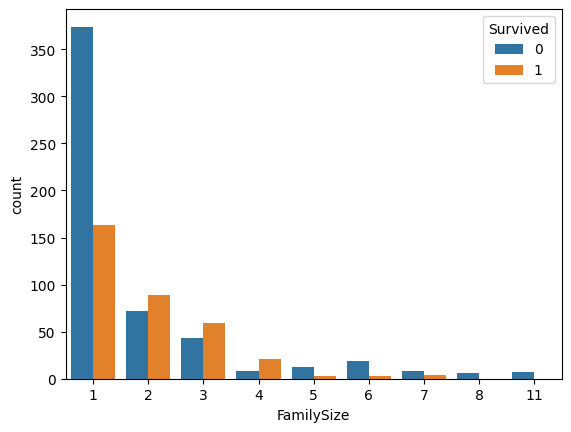

Survived,0,1
FamilySize,,
1,0.696462,0.303538
2,0.447205,0.552795
3,0.421569,0.578431
4,0.275862,0.724138
5,0.800000,0.200000
6,0.863636,0.136364
7,0.666667,0.333333
8,1.000000,0.000000
11,1.000000,0.000000


In [19]:
train["FamilySize"] = train["SibSp"] + train["Parch"] + 1
sns.countplot(data=train, x="FamilySize", hue="Survived")
plt.show()

pd.crosstab(train["FamilySize"], train["Survived"], normalize="index")

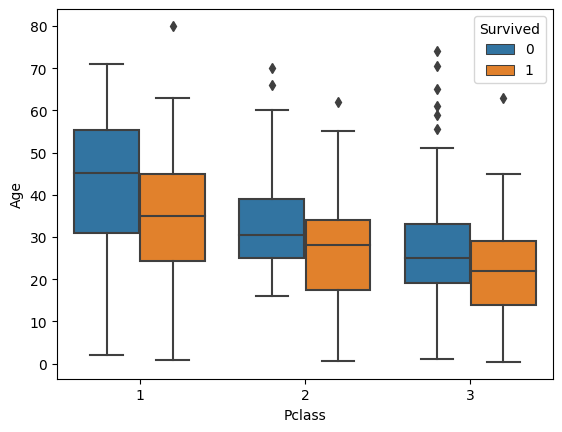

In [20]:
sns.boxplot(data=train, x="Pclass", y="Age", hue="Survived")
plt.show()

In [21]:
pd.crosstab([train["Embarked"], train["Pclass"]], train["Survived"], normalize="index")

Survived                0         1
Embarked Pclass                    
C        1       0.305882  0.694118
         2       0.470588  0.529412
         3       0.621212  0.378788
Q        1       0.500000  0.500000
         2       0.333333  0.666667
         3       0.625000  0.375000
S        1       0.417323  0.582677
         2       0.536585  0.463415
         3       0.810198  0.189802

In [22]:
train["Title"] = train["Name"].str.extract(' ([A-Za-z]+)\.', expand=False)
train["Title"].value_counts()
pd.crosstab(train["Title"], train["Survived"], normalize="index")

Survived,0,1
Title,,
Capt,1.000000,0.000000
Col,0.500000,0.500000
Countess,0.000000,1.000000
Don,1.000000,0.000000
Dr,0.571429,0.428571
Jonkheer,1.000000,0.000000
Lady,0.000000,1.000000
Major,0.500000,0.500000
Master,0.425000,0.575000


In [23]:
   for df in (train, test):
       df["FamilySize"] = df["SibSp"] + df["Parch"] + 1
       df["IsAlone"] = (df["FamilySize"] == 1).astype(int)
       df["Title"] = df["Name"].str.extract(' ([A-Za-z]+)\.', expand=False)
       df["Title"] = df["Title"].replace([
           "Lady", "Countess", "Capt", "Col", "Don", "Dr", "Major", "Rev",
           "Sir", "Jonkheer", "Dona"
       ], "Rare")
       df["Title"] = df["Title"].replace({"Mlle": "Miss", "Ms": "Miss", "Mme": "Mrs"})

In [24]:
train[["FamilySize","IsAlone","Title"]].head()

,FamilySize,IsAlone,Title
0,2,0,Mr
1,2,0,Mrs
2,1,1,Miss
3,2,0,Mrs
4,1,1,Mr


In [26]:
   from sklearn.compose import ColumnTransformer
   from sklearn.pipeline import Pipeline
   from sklearn.preprocessing import OneHotEncoder
   from sklearn.impute import SimpleImputer
   from sklearn.ensemble import RandomForestClassifier

   numeric_features = ["Age", "Fare", "FamilySize"]
   categorical_features = ["Pclass", "Sex", "Embarked", "Title", "IsAlone"]

   numeric_transformer = Pipeline([
       ("imputer", SimpleImputer(strategy="median"))
   ])

   categorical_transformer = Pipeline([
       ("imputer", SimpleImputer(strategy="most_frequent")),
       ("onehot", OneHotEncoder(handle_unknown="ignore"))
   ])

   preprocessor = ColumnTransformer([
       ("num", numeric_transformer, numeric_features),
       ("cat", categorical_transformer, categorical_features),
   ])

   clf = Pipeline([
       ("preprocess", preprocessor),
       ("model", RandomForestClassifier(random_state=42))
   ])

In [27]:
   from sklearn.model_selection import cross_val_score

   X = train[numeric_features + categorical_features]
   y = train["Survived"]
   scores = cross_val_score(clf, X, y, cv=5, scoring="accuracy")
   print("CV Accuracy:", scores.mean(), "+/-", scores.std())

CV Accuracy: 0.8036155922415416 +/- 0.03140996712007987


In [28]:
   clf.fit(X, y)
   test_preds = clf.predict(test[numeric_features + categorical_features])

   submission = pd.DataFrame({
       "PassengerId": test["PassengerId"],
       "Survived": test_preds
   })
   submission.to_csv("/workspace/submission_v2.csv", index=False)